In [32]:
#Load Dataset
!pip install tensorflow
!pip install pydot
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#Normalize the Data
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(10000,)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

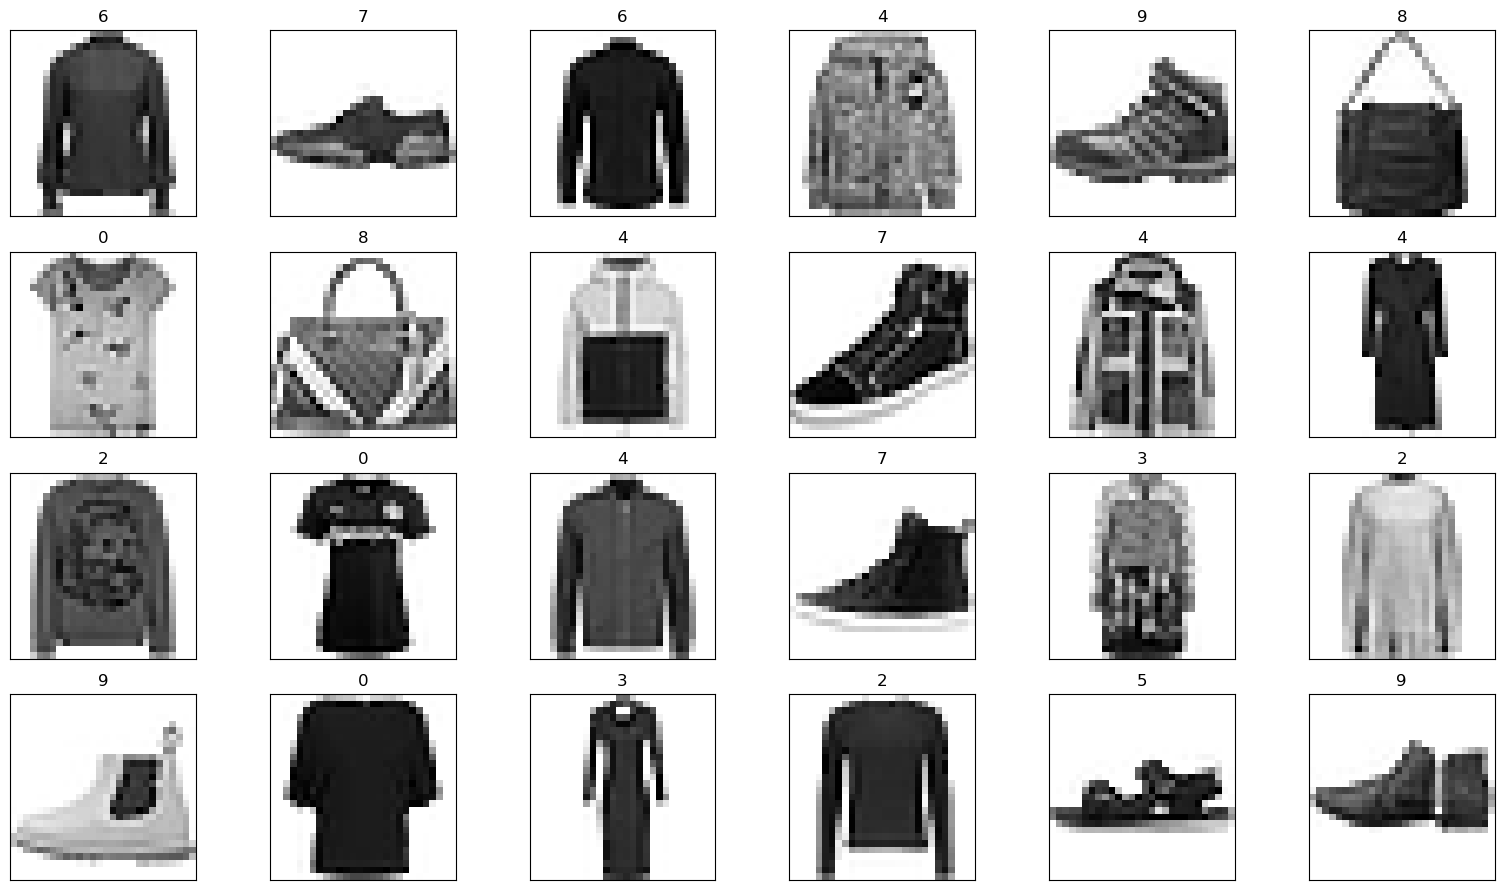

In [5]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [6]:
X_train = X_train.reshape((60000, 28, 28, 1)) 
X_train.shape
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [7]:
#Normalizing the Data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
#One-Hot Encoding: Convert Labels to Categorical Data
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train[0]
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [9]:
#Creating Neural Network
from tensorflow.keras.models import Sequential 
cnn = Sequential()
#Adding Layers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten Results
cnn.add(Flatten())
#Add Dense Layers
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

C:\Users\mikek\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Print Summary
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

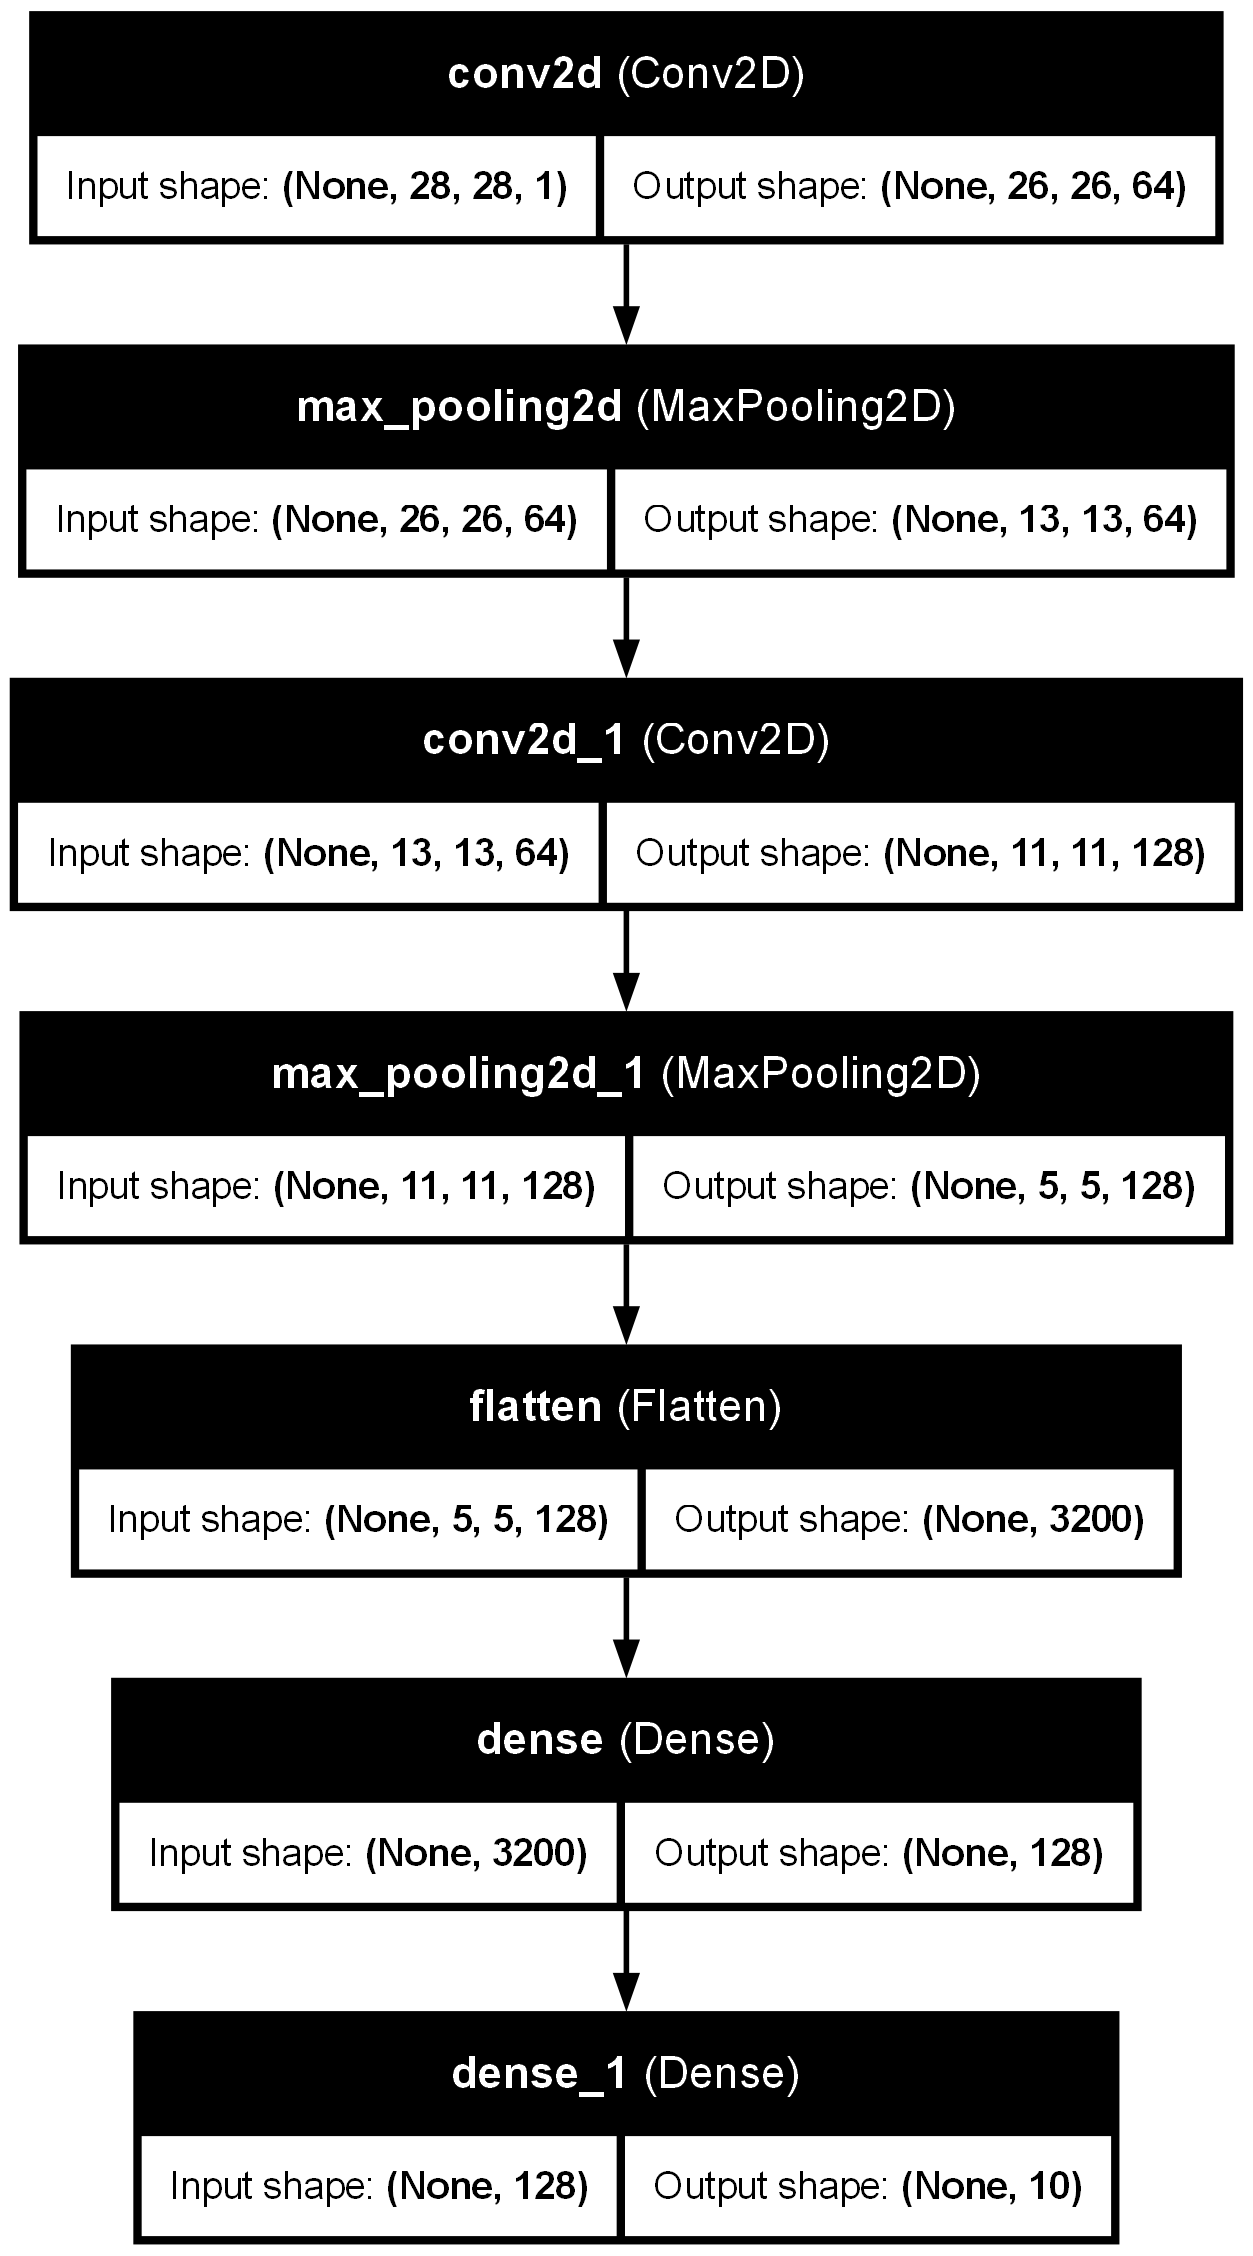

In [11]:
# Visualize
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import os
!pip install graphviz
from graphviz import Digraph

# Ensure the output directory exists
output_dir = 'Users/mikek/Users/'  # Update this to a valid path
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Create the directory if it doesn't exist

# Save the model plot to the specified directory
plot_model(cnn, to_file=os.path.join(output_dir, 'test.png'), show_shapes=True, show_layer_names=True)

# Display the saved image
Image(filename=os.path.join(output_dir, 'test.png'))

In [ ]:
#compile and train
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])          
history = cnn.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

In [40]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 74ms/step - accuracy: 0.9244 - loss: 0.2011 - val_accuracy: 0.9000 - val_loss: 0.2835
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 71ms/step - accuracy: 0.9281 - loss: 0.1896 - val_accuracy: 0.8928 - val_loss: 0.3195
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - accuracy: 0.9347 - loss: 0.1739 - val_accuracy: 0.8973 - val_loss: 0.3051
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.9371 - loss: 0.1650 - val_accuracy: 0.8792 - val_loss: 0.4012
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.9426 - loss: 0.1530 - val_accuracy: 0.8952 - val_loss: 0.3343
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 74ms/step - accuracy: 0.9488 - loss: 0.1359 - val_accuracy: 0.8997 - val_loss: 0.3469
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - accuracy: 0.9524 - loss: 0.1279 - val_accuracy: 0.8977 - val_loss: 0.3567
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - accuracy: 0.9588 - loss: 0.1107 - 

In [42]:
loss, accuracy = cnn.evaluate(X_test, y_test)
loss
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8919 - loss: 0.5103


0.894599974155426

In [44]:
#Predictions
predictions = cnn.predict(X_test)
y_test[0]
for index, probability in enumerate(predictions[0]): print(f'{index}: {probability:.10%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000560%
7: 0.0000001469%
8: 0.0000000000%
9: 100.0000000000%


In [46]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)  # number of incorrect predictions

8910

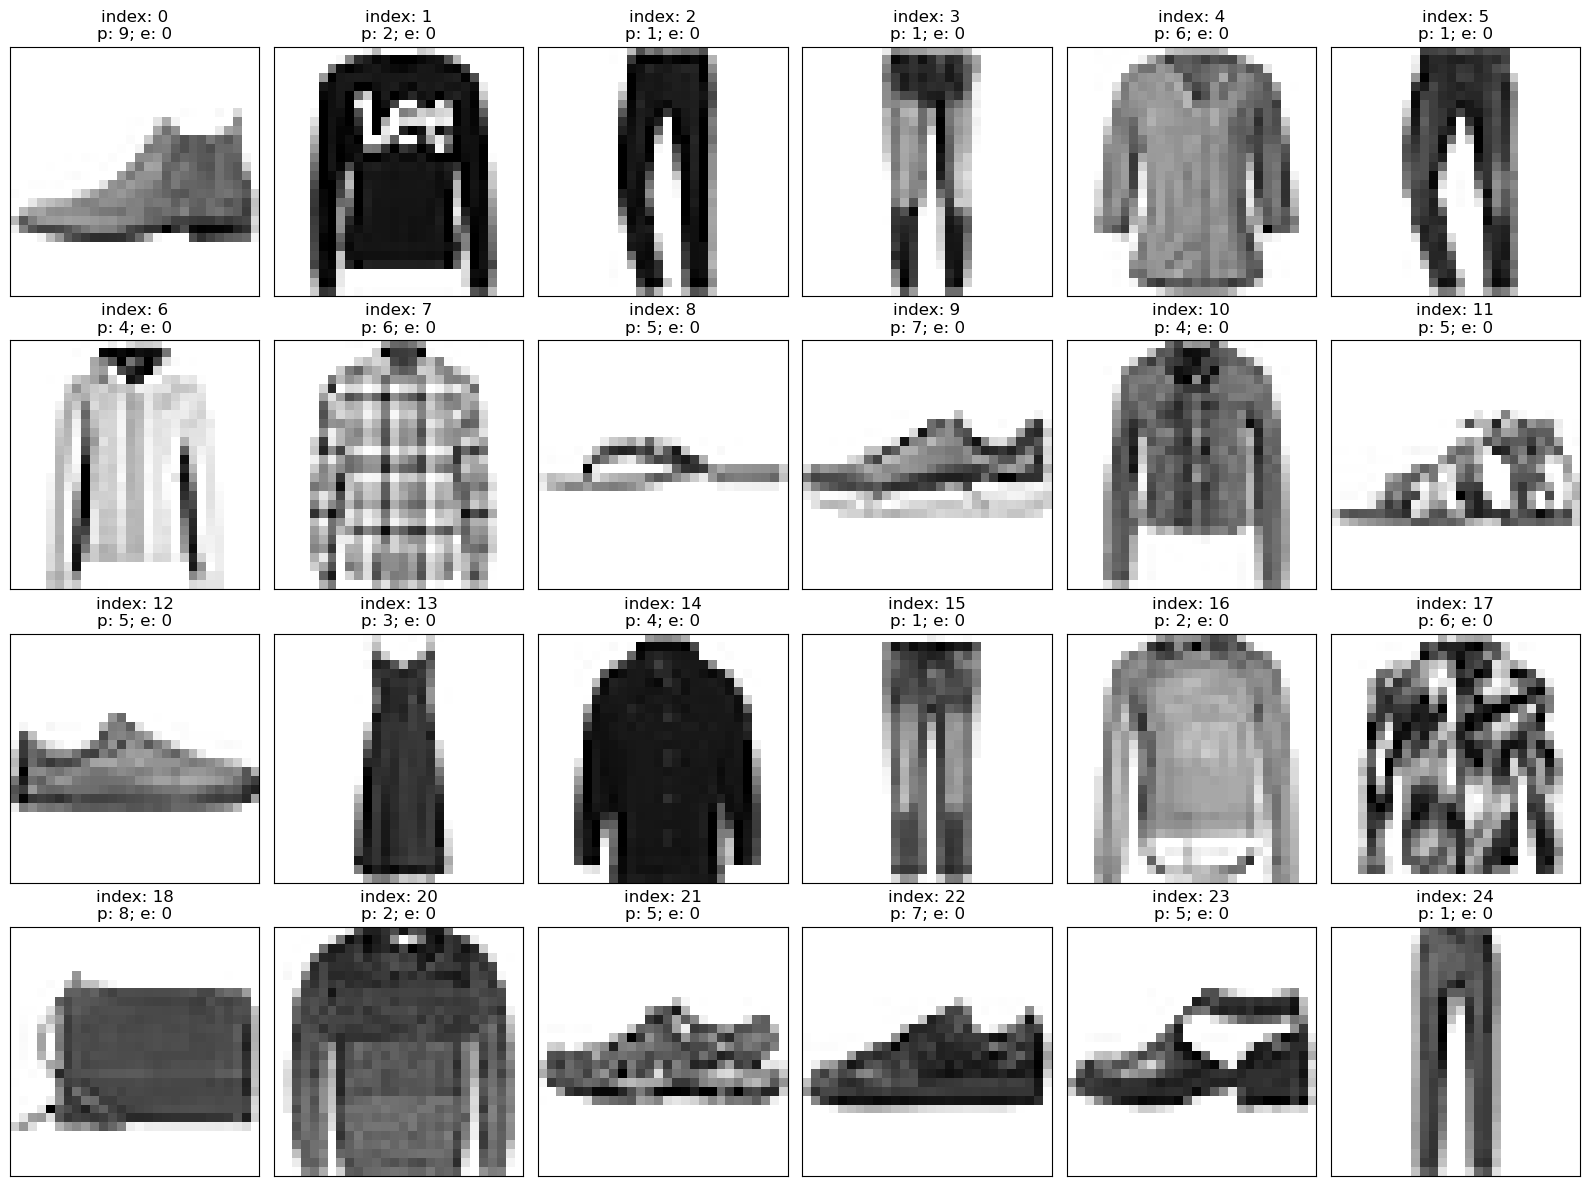

In [48]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [51]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [52]:
display_probabilities(predictions[8])

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 100.0000000000%
6: 0.0000000000%
7: 0.0000000000%
8: 0.0000000000%
9: 0.0000000000%


In [55]:
display_probabilities(predictions[18])

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 0.0000000000%
8: 100.0000000000%
9: 0.0000000000%


In [57]:
display_probabilities(predictions[11])

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 100.0000000000%
6: 0.0000000000%
7: 0.0000000001%
8: 0.0000000179%
9: 0.0000000002%


In [63]:
cnn.save('fashion_mnist_cnn.keras')